# EDA and Modeling with V1 'Toy' Dataset

- represents initial MVP of 5000 articles related to climate change
- Target is 'polarity' score
- Applies CountVectorizer and Logistic Regression

# Import Statements

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import re

# Reading and Shaping text and GDELT data

In [2]:
#reading in text data
df = pd.read_csv('cc_text_out.csv')

In [4]:
#checking shape
df.shape

(4630, 7)

In [5]:
#checking columns
df.columns

Index(['Unnamed: 0', 'gkgcode', 'link', 'title', 'author', 'publish_date',
       'text'],
      dtype='object')

In [6]:
#dropping unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
#checking nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gkgcode       4630 non-null   object
 1   link          4630 non-null   object
 2   title         4630 non-null   object
 3   author        4630 non-null   object
 4   publish_date  3654 non-null   object
 5   text          4630 non-null   object
dtypes: object(6)
memory usage: 217.2+ KB


In [8]:
#read in climate change gdelt big query
gdelt = pd.read_csv('gdelt_us_climate_change_2012_2020.csv')

In [9]:
#reviewing data
gdelt.head()

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,...,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20200919204500-562,20200919204500,1,nbcnews.com,https://www.nbcnews.com/politics/congress/demo...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_SENATORS,1003;TAX_FNCACT_SENATORS,1...","2#Arizona, United States#US#USAZ#33.7712#-111....",...,"wc:895,c1.3:5,c12.1:76,c12.10:101,c12.12:31,c1...",https://media1.s-nbcnews.com/j/newscms/2020_38...,NaN,NaN,https://youtube.com/c/Nbclearn/playlists\;http...,NaN,"With President Donald Trump,40;Senate Republic...","47,majority,309;3,of their own members,424;",NaN,<PAGE_LINKS>http://blogs.kentlaw.iit.edu/iscot...
1,20200919203000-270,20200919203000,1,nytimes.com,https://www.nytimes.com/2020/09/19/opinion/sun...,KILL#6000000##1#China#CH#CH#35#105#CH;PROTEST#...,KILL#6000000##1#China#CH#CH#35#105#CH#937;PROT...,WB_566_ENVIRONMENT_AND_NATURAL_RESOURCES;WB_17...,"TAX_FNCACT_DISPATCHERS,3007;KILL,1010;RURAL,65...","3#Douglas County, Oregon, United States#US#USO...",...,"wc:810,c1.1:1,c1.3:11,c12.1:74,c12.10:78,c12.1...",https://static01.nyt.com/images/2020/09/19/opi...,NaN,NaN,https://youtube.com/watch?v=n3C93ZWCmvM;,3147|62||our 9-1-1 dispatchers and professiona...,"Most Beautiful Farm,127;President Trump,1294;F...","5,miles,73;3,closely related reasons,670;60000...",NaN,<PAGE_LINKS>https://flashalert.net/id/MCSO/138...
2,20200919201500-833,20200919201500,1,nytimes.com,https://www.nytimes.com/live/2020/battleground...,"KILL#1##4#La Bonita, Durango, Mexico#MX#MX10#2...","KILL#1##4#La Bonita, Durango, Mexico#MX#MX10#2...",ELECTION;LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDEN...,"IDEOLOGY,16241;IDEOLOGY,25377;KILL,5713;TAX_FN...","3#Ann Arbor, Michigan, United States#US#USMI#4...",...,"wc:4786,c1.2:5,c1.3:5,c12.1:352,c12.10:446,c12...",https://static01.nyt.com/images/2020/09/20/us/...,https://static01.nyt.com/images/2020/09/13/us/...,NaN,NaN,1867|70||Trump is either 'the best president e...,"President Trump,228;Election Day,384;New York ...","12,states,152;20,electoral votes,566;7,percent...",NaN,<PAGE_LINKS>https://cookpolitical.com/;https:/...
3,20200919193000-255,20200919193000,1,nytimes.com,https://www.nytimes.com/2020/09/19/opinion/sun...,"KILL#4##2#Florida, United States#US#USFL#27.83...","KILL#4##2#Florida, United States#US#USFL#27.83...",UNGP_FORESTS_RIVERS_OCEANS;SELF_IDENTIFIED_ENV...,"TAX_FNCACT_ARSONIST,6096;CRM_ARSON,6096;CRISIS...","3#Stanford University, California, United Stat...",...,"wc:1029,c1.2:1,c1.3:28,c12.1:92,c12.10:112,c12...",https://static01.nyt.com/images/2020/09/19/opi...,NaN,NaN,NaN,4481|55||the No. 1 environmental president sin...,"Christopher Flavelle,762;Stanford University,1...","2,unfolding climate,242;5000000,acres of fores...",NaN,<PAGE_LINKS>https://apnews.com/b17b5c9200a6446...
4,20200919174500-269,20200919174500,1,huffpost.com,https://www.huffpost.com/entry/underwater-and-...,"KILL#24##3#Washington, District Of Columbia, U...","KILL#24##3#Washington, District Of Columbia, U...",UNGP_FORESTS_RIVERS_OCEANS;ENV_CLIMATECHANGE;W...,"KILL,4566;TAX_FNCACT_METEOROLOGIST,1971;TAX_FN...","2#Louisiana, United States#US#USLA#31.1801#-91...",...,"wc:925,c1.3:31,c12.1:43,c12.10:68,c12.12:26,c1...",https://img.huffingtonpost.com/asset/5f663d7b2...,NaN,NaN,NaN,NaN,"Columbia University,703;Carolina State,889;Kat...","4,inches,883;10,centimeters,892;14,already,172...",NaN,<PAGE_LINKS>https://agupubs.onlinelibrary.wile...


In [10]:
#checking shape
gdelt.shape

(4955, 27)

In [11]:
#checking columns
gdelt.columns

Index(['GKGRECORDID', 'DATE', 'SourceCollectionIdentifier', 'SourceCommonName',
       'DocumentIdentifier', 'Counts', 'V2Counts', 'Themes', 'V2Themes',
       'Locations', 'V2Locations', 'Persons', 'V2Persons', 'Organizations',
       'V2Organizations', 'V2Tone', 'Dates', 'GCAM', 'SharingImage',
       'RelatedImages', 'SocialImageEmbeds', 'SocialVideoEmbeds', 'Quotations',
       'AllNames', 'Amounts', 'TranslationInfo', 'Extras'],
      dtype='object')

In [12]:
#slice df for record id and tone column
gdelt_lookup = gdelt[['GKGRECORDID', 'V2Tone']]

In [13]:
#checking data
gdelt_lookup.head()

,GKGRECORDID,V2Tone
0,20200919204500-562,"-0.40983606557377,3.89344262295082,4.303278688..."
1,20200919203000-270,"-8.59106529209622,1.71821305841924,10.30927835..."
2,20200919201500-833,"-1.15490375802016,2.07149404216315,3.226397800..."
3,20200919193000-255,"-4.46030330062444,2.85459411239964,7.314897413..."
4,20200919174500-269,"-4.48045757864633,0.667302192564347,5.14775977..."


In [14]:
#joining gdelt slice with df on gkgcode
df_combined = df.merge(gdelt_lookup, how='left', left_on='gkgcode', right_on='GKGRECORDID')

In [15]:
#checking shape
df.shape

(4630, 6)

In [17]:
#pulling out tone score
df_combined['Tone'] = df_combined['V2Tone'].str.split(',').apply(lambda x: float(x[0]))

In [19]:
#pulling out polarity score
df_combined['polarity'] = df_combined['V2Tone'].str.split(',').apply(lambda x: float(x[3]))

In [21]:
#checking data
df_combined.head()

,gkgcode,link,title,author,publish_date,text,GKGRECORDID,V2Tone,Tone,polarity
0,20200916031500-532,https://www.nbcnews.com/news/us-news/knocking-...,'Heroes don't wear capes': Firefighters save h...,"['Tim Stelloh', 'Tim Stelloh Is A Reporter For...",2020-09-17 13:42:00+00:00,Get breaking news alerts and special reports. ...,20200916031500-532,"-3.92156862745098,0.980392156862745,4.90196078...",-3.921569,5.882353
1,20200916023000-2,https://www.msnbc.com:443/the-reidout/watch/cl...,Climate change impossible to ignore with wildf...,['Sept.'],NaN,"This week, more than ever, the effects of clim...",20200916023000-2,"-4.04040404040404,1.01010101010101,5.050505050...",-4.040404,6.060606
2,20200916013000-884,https://www.usatoday.com/story/news/nation/202...,In California: Harris and Newsom visit Creek F...,[],2020-09-15 00:00:00,Also: Farmworkers say they can't get masks. Th...,20200916013000-884,"-4.26008968609866,1.34529147982063,5.605381165...",-4.260090,6.950673
3,20200916013000-183,https://www.cnn.com/2020/09/15/politics/kamala...,Kamala Harris makes trip to California as wild...,['Kate Sullivan'],2020-09-15 00:00:00,Washington (CNN) Sen. Kamala Harris on Tuesday...,20200916013000-183,"-5.61122244488978,1.40280561122244,7.014028056...",-5.611222,8.416834
4,20200916011500-1171,https://www.msnbc.com/the-reidout/watch/climat...,Climate change impossible to ignore with wildf...,['Sept.'],NaN,"This week, more than ever, the effects of clim...",20200916011500-1171,"-4.04040404040404,1.01010101010101,5.050505050...",-4.040404,6.060606


In [22]:
#setting up x,y df
x_y = df_combined[['text', 'Tone', 'polarity']]

In [23]:
#helper function to binarize data
def tone_to_cat(x):
    if x > 0:
        return 'pos'
    elif x < 0:
        return 'neg'
    else:
        return 'neutral'

In [24]:
#creating categories from tone score
x_y['class_tone'] = x_y['Tone'].apply(lambda x: tone_to_cat(x) )

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#checking distribution of counts
x_y['class_tone'].value_counts()

neg        3576
pos         974
neutral      80
Name: class_tone, dtype: int64

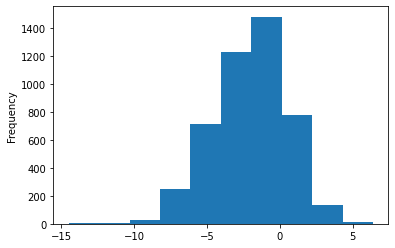

In [26]:
#checking distribution of tone scores

x_y['Tone'].apply(lambda x: round(x, 1)).plot(kind='hist')

In [27]:
#checking mean of tone
x_y['Tone'].mean()

-1.9919740121022211

In [28]:
#setting new binary category where dividing line is -2
x_y['binary_tone'] = np.where(x_y['Tone'] >= -2, 'pos', 'neg')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#checking target balance
x_y['binary_tone'].value_counts()

pos    2466
neg    2164
Name: binary_tone, dtype: int64

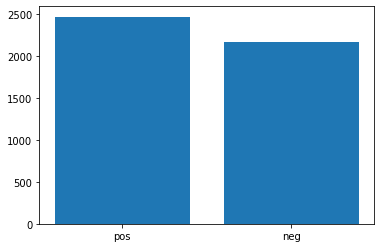

In [33]:
#plotting target balance
plt.figure()
plt.bar(x=x_y['binary_tone'].value_counts().index, height=x_y['binary_tone'].value_counts())
plt.show()

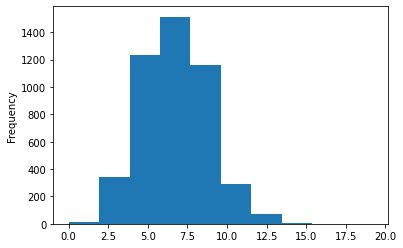

In [29]:
#checking distribution of polarity
x_y['polarity'].apply(lambda x: round(x, 2)).plot(kind='hist')

In [30]:
#checking polarity mean
x_y['polarity'].mean()

6.736227922152966

In [31]:
#binarize polarity
x_y['binary_polarity'] = np.where(x_y['polarity'] >= 6.5, 'pos', 'neg')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#checking class distribution
x_y['binary_polarity'].value_counts()

pos    2444
neg    2186
Name: binary_polarity, dtype: int64

In [39]:
x_y.to_csv('text_tone_polarity.csv')

#### Getting Spacy running

In [37]:
#importing spacy and installing language model
import spacy
!python -m spacy download en_core_web_sm

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [52]:
#defining tokenizer for bagofwords
#this tokenizer appears in almost all of my model notebooks, where I defined it
nlp = spacy.load("en_core_web_sm")
def tokenizer(text):
    token_list = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop == False and token.is_punct==False:
            if token.text != ' ':
                token_list.append((token.lemma_).lower())
    return token_list

In [65]:
#numerical binarizing polarity score
x_y['binary_polarity_num'] = x_y['binary_polarity'].apply(lambda x: np.where(x=='pos', 1, 0))

<ipython-input-65-e3746586a780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_y['binary_polarity_num'] = x_y['binary_polarity'].apply(lambda x: np.where(x=='pos', 1, 0))


In [66]:
#reviewing data
x_y.head()

,text,Tone,polarity,class_tone,binary_tone,binary_polarity,binary_polarity_num
0,Get breaking news alerts and special reports. ...,-3.921569,5.882353,neg,neg,neg,0
1,"This week, more than ever, the effects of clim...",-4.040404,6.060606,neg,neg,neg,0
2,Also: Farmworkers say they can't get masks. Th...,-4.260090,6.950673,neg,neg,pos,1
3,Washington (CNN) Sen. Kamala Harris on Tuesday...,-5.611222,8.416834,neg,neg,pos,1
4,"This week, more than ever, the effects of clim...",-4.040404,6.060606,neg,neg,neg,0


# Logistic Regression with Bag of Words, Polarity Target

- Applies CountVectorizer
- GDELT Polarity scores as target
- Test acc: 81.8 percent
- Train accuracy: 84.8 percent

In [67]:
#test train split
X_train, X_test, y_train,y_test = train_test_split(x_y['text'], x_y['binary_polarity_num'], test_size=.3)

In [57]:
#instantiating model
bagofwords = CountVectorizer(min_df=5, tokenizer=tokenizer)

#fit model
bagogwords.fit(X_train)

In [68]:
#transform X train and test
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

In [132]:
#instantiate model
model = LogisticRegression(C=.01, solver='saga')


In [133]:
#fit model
model.fit(X_train_transformed, y_train)

/Users/aschharwood/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.01, solver='saga')

In [134]:
#score test
model.score(X_test_transformed, y_test)

0.8178545716342692

In [135]:
#score train
model.score(X_train_transformed, y_train)

0.8475779080530701

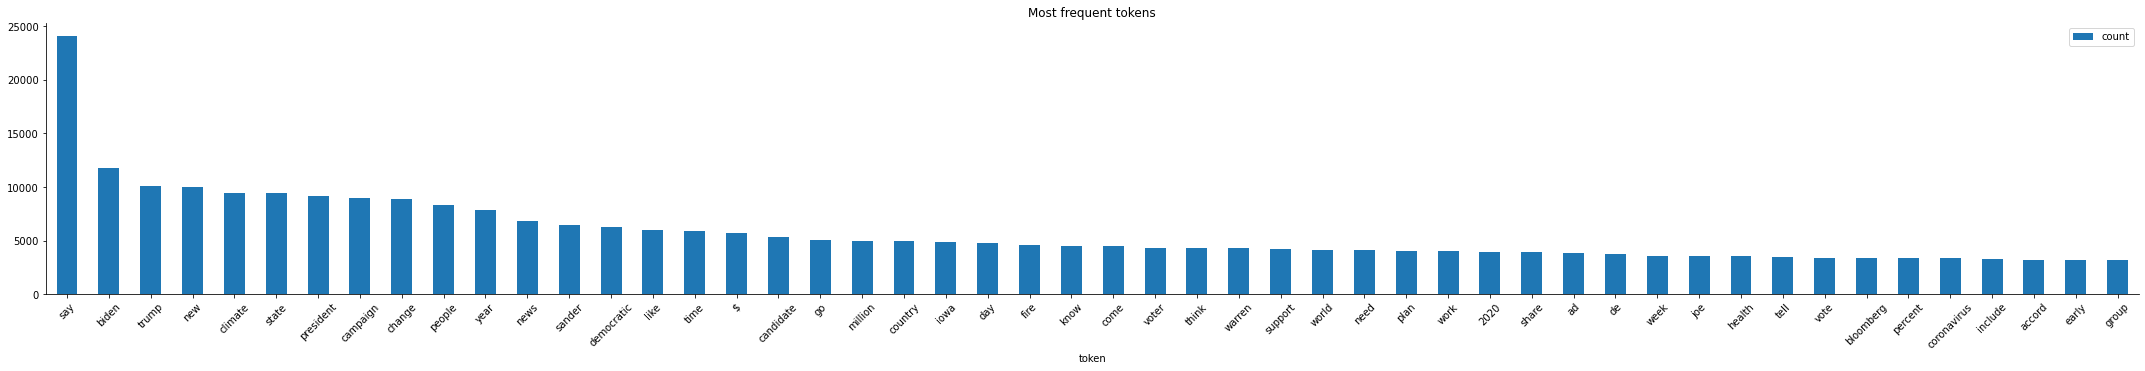

In [147]:
#plot most common words
#borrowed this plotting function from lecture notebook

#get word counts
word_counts = X_train_transformed.toarray().sum(axis=0)

#get feature names
words = bagofwords.get_feature_names()

#defines function to plot most frequent words
def plot_most_frequent(words, word_counts, top=50):
   #creates dataframe from word count and tokens
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    #defines a suplot figure size that is proportional to the number of top words defined
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    
    #sorts values by word count, returns `top` num of words, and plots bar chart
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    #removes spine
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

In [148]:
#saving X_train_transformed and X_test_transformed
# import scipy.sparse
# scipy.sparse.save_npz('X_train_transformed_sparse_matrix.npz', X_train_transformed)

In [149]:
# scipy.sparse.save_npz('X_train_transformed_sparse_matrix.npz', X_test_transformed)

# Building speaker quotes tokenizer and modeling function

In [150]:
#defines a tokenizer that extracts only speaker quotes from text articles to be used in CountVectorizer

def tokenizer_quote(doc):
    #passes text to spacy doc object
    doc = nlp(doc)
    quote_list = []
    
    #defines regular expression that looks for text that only appears between quotation marks
    expression = r'\"(.*?)\"'
    #uses regular expression to looked for quoted speakers in doc object
    for match in re.finditer(expression, doc.text):
        #when it finds a match, it returns the the indexes for the beginning and the end of the string and passes 
        #span is a spacy object, which is basicaly a slice of its doc object
        start, end = match.span()
        
        #creates a span object based on indexes
        span = doc.char_span(start, end)
        # This is a Span object or None if match doesn't map to valid token sequence
        if span is not None:
            #append quote span to list
            quote_list.append(span)
        #extracts all the words from each span and creates one  list of tokens
    flat_words = [item for sublist in quote_list for item in sublist]

    
    token_list = []
    #converts flat_words list to string and passes to doc object
    doc = nlp(str(flat_words))
    #loops through tokens in doc, removes stop words, punctuation, and whitespaces, lemmatizes words, lower_cases and returns clean tokens
    for token in doc:
        if token.is_stop == False and token.is_punct==False:
            if token.text != ' ':
                token_list.append((token.lemma_).lower())
    return token_list

In [164]:
#defines a modeling function, which I ultimately abandoned becaused I wanted easier access to the various objects it creates
def modeling_function(X, y, tokenizer):
    #train_test_split
    X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=.3)
    print(f'Split done - X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')
    
    #create vectorizer
    bagofwords = CountVectorizer(min_df=5, tokenizer=tokenizer)
    print('vectorizer done')
    
    #fit vectorizer
    print('beginng vectorizer fitting')
    bagofwords.fit(X_train)
    print('vectorizer fitting complete')
    
    
    #transform X_train
    print('beginning transformation')
    X_train_transformed = bagofwords.transform(X_train)
    print('X_train transformed')
    
    #transform X_test
    X_test_transformed = bagofwords.transform(X_test)
    print('X_test_transformed')
    
    #create model
    print('creating model')
    model = LogisticRegression(C=1, solver='liblinear')
    print('model completed')
    
    
    #fit model
    print('fitting model')
    model.fit(X_train_transformed, y_train)
    print('model fitted')
    
    #score training set 
    print('scoring training data')
    train_score = model.score(X_train_transformed, y_train)
    
    #score test set
    print('scoring test data')
    test_score = model.score(X_test_transformed, y_test)
    
    print(f'Training score: {train_score}')
    print(f'Test score: {test_score}')
    return (bagofwords, model, X_train_transformed, X_test_transformed, y_train, y_test)
    
    
    

In [152]:
x_y.head()

,text,Tone,polarity,class_tone,binary_tone,binary_polarity,binary_polarity_num
0,Get breaking news alerts and special reports. ...,-3.921569,5.882353,neg,neg,neg,0
1,"This week, more than ever, the effects of clim...",-4.040404,6.060606,neg,neg,neg,0
2,Also: Farmworkers say they can't get masks. Th...,-4.260090,6.950673,neg,neg,pos,1
3,Washington (CNN) Sen. Kamala Harris on Tuesday...,-5.611222,8.416834,neg,neg,pos,1
4,"This week, more than ever, the effects of clim...",-4.040404,6.060606,neg,neg,neg,0


# Log Reg, CountVectorizer, Feature = Quotes Only, Target = Binarized Polarity

- this model uses only speaker quotes (i.e. quotes from politicians, interviewees, etc) as the text to predict binary polarity
- Train acc: 80.2 percent
- Test acc: 69.04 percent

- I abandoned this approach earlier on, but in retrospect, I only tested on a small dataset of 5000, and I didn't do any hyperparameter tuning
- The advantage here is significantly reduces the size of the corpus

In [165]:
#applies function to article text, binary_polarity
bagofwords, model, X_train_transformed, X_test_transformed, y_train, y_test = modeling_function(x_y['text'], x_y['binary_polarity_num'], tokenizer_quote)

Split done - X_train shape: (3241,), X_test shape: (1389,), y_train shape: (3241,), y_test shape: (1389,)
vectorizer done
beginng vectorizer fitting


/Users/aschharwood/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


vectorizer fitting complete
beginning transformation
X_train transformed
X_test_transformed
creating model
model completed
fitting model
model fitted
scoring training data
scoring test data
Training score: 0.8025300833076211
Test score: 0.6904247660187185


In [159]:
len(bagofwords.get_feature_names())

5078